# Ranking de StackOverflow

In [54]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [38]:
df = pd.read_csv('./data/survey_results_public.csv')
df.head(5)

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [39]:
df.rename(columns= {'LanguageHaveWorkedWith' : 'lenguaje', 'ConvertedCompYearly': 'Salary'}, inplace= True)
df.dropna(subset = ['Salary', 'lenguaje'], inplace= True)



In [40]:
df['lenguaje']

0            C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift
9                                               C++;Python
11       Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...
12                                    C;C++;Java;Perl;Ruby
16                     C#;HTML/CSS;Java;JavaScript;Node.js
                               ...                        
83433        Java;JavaScript;Kotlin;Objective-C;TypeScript
83434                                   Clojure;Kotlin;SQL
83436                                   Groovy;Java;Python
83437                 Bash/Shell;JavaScript;Node.js;Python
83438               Delphi;Elixir;HTML/CSS;Java;JavaScript
Name: lenguaje, Length: 46693, dtype: object

In [41]:
result = df.loc[:,['Country', 'lenguaje', 'Salary']].sort_values(by= 'Salary') #ordenar de menor y mayor el salario x lenguaje


In [42]:
filter = (result['Salary'] >= 10000) & (result['Salary'] <= 2e6)
result = result[filter]
result.loc[: , ['Country', 'lenguaje', 'Salary']].sort_values(by = 'Salary')

,Country,lenguaje,Salary
28767,Brazil,HTML/CSS;JavaScript;Node.js;PHP;SQL,10000.0
68656,Russian Federation,Bash/Shell;C;C#;C++;Matlab;Python;SQL,10000.0
55309,Bangladesh,JavaScript;Node.js;PHP,10000.0
27788,United States of America,Bash/Shell;C++;HTML/CSS;JavaScript;Kotlin;Node...,10000.0
16263,Kenya,C++;HTML/CSS;Java;JavaScript;Node.js;R,10000.0
...,...,...,...
20745,United States of America,Bash/Shell;Java;Python;Ruby;Rust;TypeScript,1980000.0
51764,United States of America,Go;Groovy;Java;JavaScript;Kotlin;Node.js;TypeS...,1992000.0
49603,United Kingdom of Great Britain and Northern I...,Bash/Shell;C#;PowerShell;SQL,1999380.0
7560,United States of America,Go;HTML/CSS;JavaScript;Node.js;Python;Rust;SQL...,2000000.0


In [45]:
lg = result['lenguaje']
alllenguajes = lg.str.split(';')
alllenguajes

28767            [HTML/CSS, JavaScript, Node.js, PHP, SQL]
68656        [Bash/Shell, C, C#, C++, Matlab, Python, SQL]
55309                           [JavaScript, Node.js, PHP]
27788    [Bash/Shell, C++, HTML/CSS, JavaScript, Kotlin...
16263        [C++, HTML/CSS, Java, JavaScript, Node.js, R]
                               ...                        
20745    [Bash/Shell, Java, Python, Ruby, Rust, TypeScr...
51764    [Go, Groovy, Java, JavaScript, Kotlin, Node.js...
49603                    [Bash/Shell, C#, PowerShell, SQL]
7560     [Go, HTML/CSS, JavaScript, Node.js, Python, Ru...
38139    [C, C#, C++, Go, HTML/CSS, JavaScript, Kotlin,...
Name: lenguaje, Length: 42348, dtype: object

In [53]:
lenguajesall = []

for row in lg:
    for leng in row.split(';'):
        lenguajesall.append(leng)

lenguajesall  = list(set(lenguajesall))
lenguajesall

['Elixir',
 'TypeScript',
 'Swift',
 'Java',
 'Julia',
 'HTML/CSS',
 'COBOL',
 'Go',
 'C#',
 'Dart',
 'Scala',
 'Clojure',
 'Matlab',
 'F#',
 'Haskell',
 'Node.js',
 'Bash/Shell',
 'Ruby',
 'Python',
 'PHP',
 'Rust',
 'VBA',
 'Perl',
 'Delphi',
 'Crystal',
 'SQL',
 'C++',
 'LISP',
 'Assembly',
 'Objective-C',
 'PowerShell',
 'APL',
 'JavaScript',
 'R',
 'Groovy',
 'C',
 'Erlang',
 'Kotlin']

# Contruir el DataFrame

In [56]:
salaryMean = pd.DataFrame(data = np.zeros(len(lenguajesall)), index= lenguajesall, columns=['Salary'])
salaryMean

,Salary
Elixir,0.0
TypeScript,0.0
Swift,0.0
Java,0.0
Julia,0.0
HTML/CSS,0.0
COBOL,0.0
Go,0.0
C#,0.0
Dart,0.0


In [58]:
import re

for lang in lenguajesall:
    mask = result['lenguaje'].str.contains(re.escape(lang))
    average = result.loc[mask, 'Salary'].mean()
    salaryMean.loc[lang, "Salary"] = average

salaryMean

,Salary
Elixir,124718.763374
TypeScript,100001.099572
Swift,104934.694953
Java,94612.691769
Julia,126910.490950
HTML/CSS,93019.673490
COBOL,125024.611650
Go,119301.904921
C#,94412.241655
Dart,78321.992693


In [59]:
colors = [
    "#03071E",
    "#370617",
    "#6A040F",
    "#9D0208",
    "#D00000",
    "#DC2F02",
    "#E85D04",
    "#F48C06",
    "#FAA307",
    "#FFBA08"
]

fontdict = {
    'family': 'serif',
    'color':  'darkred',
    'weight': 'normal',
    'size': 16,
}

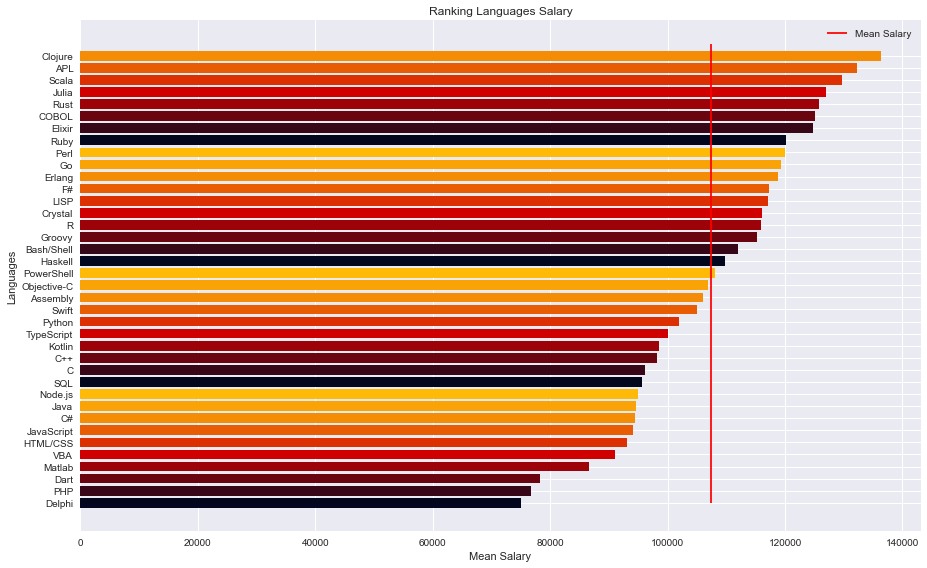

In [68]:
plt.style.use("seaborn")
plt.figure(figsize= (13,8))

salaryMean.sort_values(by= 'Salary', inplace= True)

plt.barh(salaryMean.index, salaryMean["Salary"], color = colors)
plt.vlines(salaryMean['Salary'].mean(), 0 , len(salaryMean['Salary']), colors= 'red', label= 'Mean Salary')

plt.title('Ranking Languages Salary')
plt.xlabel('Mean Salary')
plt.ylabel('Languages')

plt.legend()
plt.tight_layout()
plt.show()